# Week 4 Assignment

## Assignment Details
Download `1962_2006_walmart_store_openings.csv` from canvas.

Alternatively, file is available here:
https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv

It contains information on Walmart store openings between the years 1962-2006. Some explanations on the meaning of variable names:

- `storenum`: the unique store number (storenumber is an id, not a count)	
- `OPENDATE`: the date the original store was opened
- `date_super`: the date the store became a super store
- `conversion`: whether the original store was converted to a super store
- `STRCITY`: the name of the city where the store is located
- `STRSTATE`: the state where the store is located


### Q1 
Import the dataset from the gitbub repository into a pandas dataframe.
Read the data and check dataframe datat types

Begin Problem 1

In [15]:
# Your solution here

In [16]:
#test


In [17]:
##Your code here
import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv"
df = pd.read_csv(url)
df.head()
df.info()

# Test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   storenum    2992 non-null   int64  
 1   OPENDATE    2992 non-null   object 
 2   date_super  1946 non-null   object 
 3   conversion  1946 non-null   float64
 4   st          2992 non-null   int64  
 5   county      2992 non-null   int64  
 6   STREETADDR  2992 non-null   object 
 7   STRCITY     2992 non-null   object 
 8   STRSTATE    2992 non-null   object 
 9   ZIPCODE     2992 non-null   int64  
 10  type_store  2992 non-null   object 
 11  LAT         2992 non-null   float64
 12  LON         2992 non-null   float64
 13  MONTH       2992 non-null   int64  
 14  DAY         2992 non-null   int64  
 15  YEAR        2992 non-null   int64  
dtypes: float64(3), int64(7), object(6)
memory usage: 374.1+ KB


In [18]:
#End of Test

### Question 2 
Change all the columns so they are consistenly lower case and multiple words are separated by '_' as in date_super.

Begin Problem 2

In [19]:
#Your code and Output
# Rename columns to lowercase with underscores
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.head()

,storenum,opendate,date_super,conversion,st,county,streetaddr,strcity,strstate,zipcode,type_store,lat,lon,month,day,year
0,1,7/1/62,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,10/1/67,NaN,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967


End Problem 2

## Question 3

### Check the data type of "opendata" and date_super" and change to proper datatype
### Hint: use "datetime" type

Begin Problem 3

In [20]:
# your code here

# Apply the condition to interpret two-digit years
def interpret_year(date_string):
    # Check if the value is a string
    if isinstance(date_string, str):
        month, day, year = date_string.split('/')
        if int(year) <= 6:
            year = '20' + year
        else:
            year = '19' + year
        return f"{month}/{day}/{year}"
    else:
        return date_string

df['opendate'] = df['opendate'].apply(interpret_year)
df['date_super'] = df['date_super'].apply(interpret_year)

# change 'opendate' and 'date_super' to the proper 'date' type
df['opendate'] = pd.to_datetime(df['opendate'])
df['date_super'] = pd.to_datetime(df['date_super'])

#Test
df.dtypes
df.head()

,storenum,opendate,date_super,conversion,st,county,streetaddr,strcity,strstate,zipcode,type_store,lat,lon,month,day,year
0,1,1962-07-01,1997-03-01,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,1964-08-01,1996-03-01,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,1965-08-01,2002-03-01,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,1967-10-01,1993-03-01,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,1967-10-01,NaT,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967


End Problem 3

## Question 4 

Delete the "st" and "county" columns from dataframe and copy to a new dataframe

Your solution here

In [21]:
# Your code and output here
new_df = df.drop(columns = ['st', 'county'])

new_df.head()

,storenum,opendate,date_super,conversion,streetaddr,strcity,strstate,zipcode,type_store,lat,lon,month,day,year
0,1,1962-07-01,1997-03-01,1.0,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,1964-08-01,1996-03-01,1.0,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,1965-08-01,2002-03-01,1.0,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,1967-10-01,1993-03-01,1.0,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,1967-10-01,NaT,NaN,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967


End your solution

### Question 5

Create 2 new data frames called store_address and store_info.  Store address should contain the columns: store_num, address, city, state, zip_code (or your equivalent names).  Store_info should contain the columns: store_num, conversion, open_date, date_super, store_type, latitude, and longitude (or your equivalent names). 

Begin Problem 5

In [22]:
#Your code and output here
# Create 'store_address' DataFrame
store_address = df[['storenum', 'streetaddr', 'strcity', 'strstate', 'zipcode']]

#test
store_address.head()

#Your code and output here
# Create 'store_info' DataFrame
store_info = df[['storenum', 'conversion', 'opendate', 'date_super', 'type_store', 'lat', 'lon']]

#test
store_info.head()

,storenum,conversion,opendate,date_super,type_store,lat,lon
0,1,1.0,1962-07-01,1997-03-01,Supercenter,36.342235,-94.07141
1,2,1.0,1964-08-01,1996-03-01,Supercenter,36.236984,-93.09345
2,4,1.0,1965-08-01,2002-03-01,Supercenter,36.179905,-94.50208
3,8,1.0,1967-10-01,1993-03-01,Supercenter,35.156491,-92.75858
4,7,NaN,1967-10-01,NaT,Wal-Mart,34.813269,-92.30229


End Problem 5

## Question 6
### Delete columns "month", "date" and "year" from the original dataframe


In [23]:
##Your code here
df = df.drop(columns= ['month', 'day', 'year'])

#Test
df.head(20)

,storenum,opendate,date_super,conversion,st,county,streetaddr,strcity,strstate,zipcode,type_store,lat,lon
0,1,1962-07-01,1997-03-01,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.071410
1,2,1964-08-01,1996-03-01,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.093450
2,4,1965-08-01,2002-03-01,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.502080
3,8,1967-10-01,1993-03-01,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.758580
4,7,1967-10-01,NaT,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.302290
5,10,1968-07-01,1998-03-01,1.0,40,21,2020 SOUTH MUSKOGEE,Tahlequah,OK,74464,Supercenter,35.923658,-94.971850
6,13,1968-11-01,1996-03-01,1.0,29,97,2705 GRAND AVE,Carthage,MO,64836,Supercenter,37.168985,-94.311640
7,12,1968-07-01,1994-03-01,1.0,40,131,1500 LYNN RIGGS BLVD,Claremore,OK,74017,Supercenter,36.327143,-95.611920
8,11,1968-03-01,2002-02-20,1.0,5,5,65 WAL-MART DRIVE,Mountain Home,AR,72653,Supercenter,36.329026,-92.357810
9,9,1968-03-01,2000-03-01,1.0,29,143,1303 SOUTH MAIN,Sikeston,MO,63801,Supercenter,36.891163,-89.583550


In [24]:
# End of Question 6

### Question 7

Which state has the highest total number of Walmart super stores? 
Store your result in a variable called **highest**.


Begin Problem 7

In [25]:
## Your code here
# filter super stores only
df_ss = df[df['conversion'] == 1.0]

# group by state and find the highest number of super stores
gr_by_state = df_ss.groupby('strstate')['storenum'].count().reset_index()
gr_by_state = gr_by_state.rename(columns = {'storenum': 'Number of super stores'})
gr_by_state = gr_by_state.sort_values(by = 'Number of super stores', ascending = False)
highest = gr_by_state.iloc[0]

#test
highest

strstate                   TX
Number of super stores    200
Name: 34, dtype: object

End Problem 7

## Question 8


In [26]:
# ## Your solution code here
# # Define the list of target states
# target_states = ['WI', 'MN', 'CA', 'AK', 'ME']
#
# # Filter Walmart "supercenter" in the target states
# super_centers = df[(df['strstate'].isin(target_states)) & (df['type_store'] == 'Supercenter')]
#
# print(super_centers)

# if we want to list separate state
WI_sc = df[(df['strstate'] == 'WI') & (df['type_store'] == 'Supercenter')]
print("Wisconsin Supercenters:")
print(WI_sc)

MN_sc = df[(df['strstate'] == 'MN') & (df['type_store'] == 'Supercenter')]
print("\nMinnesota Supercenters:")
print(MN_sc)

CA_sc = df[(df['strstate'] == 'CA') & (df['type_store'] == 'Supercenter')]
print("\nCalifornia Supercenters:")
print(CA_sc)

AK_sc = df[(df['strstate'] == 'AK') & (df['type_store'] == 'Supercenter')]
print("\nAlaska Supercenters:")
print(AK_sc)

ME_sc = df[(df['strstate'] == 'ME') & (df['type_store'] == 'Supercenter')]
print("\nMaine Supercenters:")
print(ME_sc)

Wisconsin Supercenters:
      storenum   opendate date_super  conversion  st  county  \
821        882 1986-02-04 2002-03-20         1.0  55      23   
853        910 1986-03-04 2004-05-19         1.0  55     127   
907        965 1986-09-16 2002-03-01         1.0  55      81   
914        971 1986-10-28 2000-03-01         1.0  55     123   
922        979 1986-11-18 2003-09-17         1.0  55      81   
996       1007 1987-02-03 2000-03-01         1.0  55     103   
999       1012 1987-05-12 2004-08-25         1.0  55      27   
1157      1202 1988-08-16 2002-03-01         1.0  55     141   
1320      1396 1989-12-30 2001-03-14         1.0  55     111   
1326      1430 1989-12-30 2003-03-19         1.0  55     139   
1410      1446 1990-08-01 2005-10-26         1.0  55       5   
1414      1449 1990-08-01 2003-04-23         1.0  55      71   
1419      1453 1990-01-31 2003-06-25         1.0  55       9   
1475      1571 1990-12-31 2005-08-24         1.0  55     133   
1522      1447 1

## Question 9

In [27]:
# Your solution here
# Find the oldest store
oldest_stores = df[df['opendate'] == df['opendate'].min()]

# Find the newest store
newest_stores = df[df['opendate'] == df['opendate'].max()]

print("Oldest Stores Details:")
print(oldest_stores)

print("\nNewest Stores Details:")
print(newest_stores)


Oldest Stores Details:
   storenum   opendate date_super  conversion  st  county        streetaddr  \
0         1 1962-07-01 1997-03-01         1.0   5       7  2110 WEST WALNUT   

  strcity strstate  zipcode   type_store        lat       lon  
0  Rogers       AR    72756  Supercenter  36.342235 -94.07141  

Newest Stores Details:
      storenum   opendate date_super  conversion  st  county  \
2956      5470 2006-01-31 2006-01-31         0.0  42      61   
2966      5436 2006-01-31        NaT         NaN  10       3   
2970      3838 2006-01-31 2006-01-31         0.0  42       3   
2972      5497 2006-01-31 2006-01-31         0.0  36      45   
2974      3660 2006-01-31 2006-01-31         0.0  47      65   
2977      3305 2006-01-31 2006-01-31         0.0  37     157   
2980      2852 2006-01-31 2006-01-31         0.0  54      51   
2981      5370 2006-01-31 2006-01-31         0.0   8      13   
2982      3608 2006-01-31 2006-01-31         0.0  39      85   
2983      5253 2006-01-31 

### Question 10

Using one of the three plotting libraries we discussed (*matplotlib*, *seaborn*, and *bokeh*) or using as many as you want to try, plot the time series of cumulative store count over time for the state of Idaho (ID), for the state of California (CA), and for the state of Florida (FL). 

Begin Problem 10

/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_18173/484769475.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ID_stores['cumulative_count'] = ID_stores.groupby('strstate')['storenum'].cumcount() + 1
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_18173/484769475.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_stores['cumulative_count'] = CA_stores.groupby('strstate')['storenum'].cumcount() + 1
/var/folders/3h/631y9grn15xf3n6ybqs6vrp40000gn/T/ipykernel_18173/484769475.py:

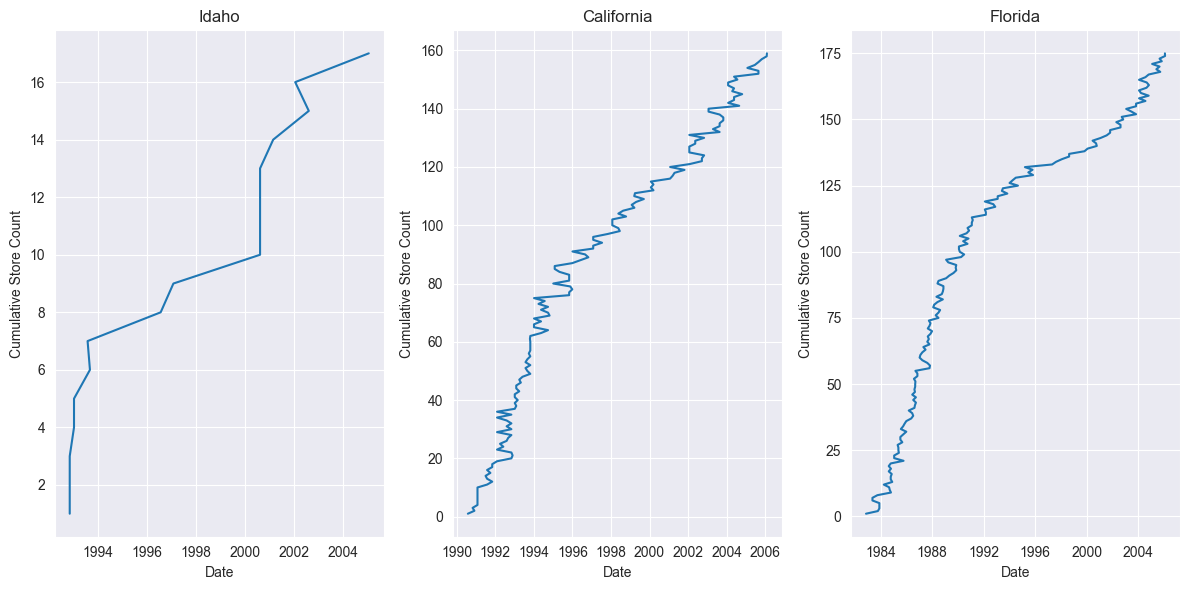

In [28]:
##Your code solution here
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk

# Filter for the desired states
ID_stores = df[df['strstate'] == 'ID']
CA_stores = df[df['strstate'] == 'CA']
FL_stores = df[df['strstate'] == 'FL']

# Calculate cumulative store counts
ID_stores['cumulative_count'] = ID_stores.groupby('strstate')['storenum'].cumcount() + 1
CA_stores['cumulative_count'] = CA_stores.groupby('strstate')['storenum'].cumcount() + 1
FL_stores['cumulative_count'] = FL_stores.groupby('strstate')['storenum'].cumcount() + 1

# Create subplots
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(ID_stores['opendate'], ID_stores['cumulative_count'])
plt.title('Idaho')
plt.xlabel('Date')
plt.ylabel('Cumulative Store Count')

plt.subplot(132)
plt.plot(CA_stores['opendate'], CA_stores['cumulative_count'])
plt.title('California')
plt.xlabel('Date')
plt.ylabel('Cumulative Store Count')

plt.subplot(133)
plt.plot(FL_stores['opendate'], FL_stores['cumulative_count'])
plt.title('Florida')
plt.xlabel('Date')
plt.ylabel('Cumulative Store Count')

plt.tight_layout()
plt.show()

#Visualization plot here

End Problem 10

###  Question 11

Using at least one of three plotting libraries we discussed (*matplotlib*, *seaborn*, and *bokeh*) or as many as you want to try, plot a bar chart that shows the `total` number of Walmart stores in each of the states that directly border the state of Maine and New York. 

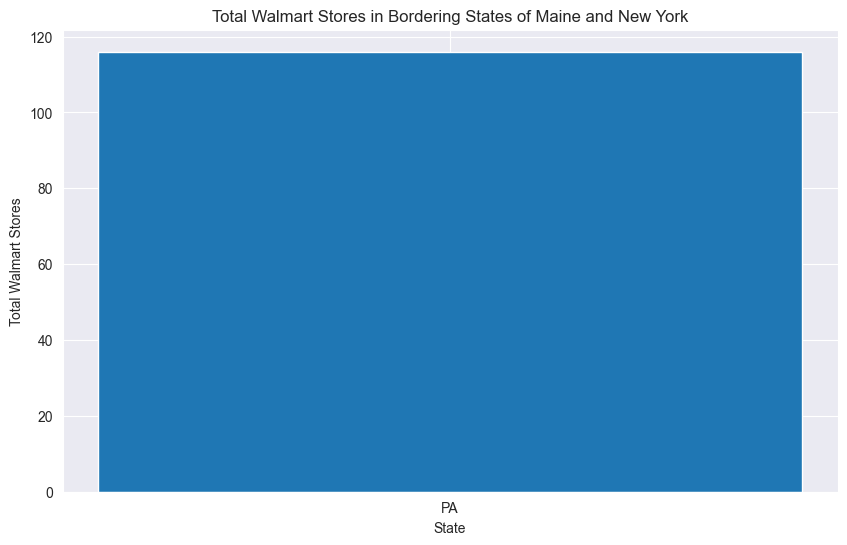

In [29]:
# Your solution here
# One state border Maine: New Hampshire (NH)
# Five states border New York: Vermont (VT), Massachusetts (MA), Connecticut (CT), New Jersey (NJ), Pennsylvania (PA)

# Create a list of border states
border_states = ['NH', 'VT', 'MA', 'CT', 'NJ', 'PA']

# Filter for stores in border states
border_stores = df[df['strstate'].isin(border_states)]

# Calculate the total number of stores in each border state
total_stores_by_state = border_stores.groupby('strstate')['storenum'].count().reset_index()
total_stores_by_state.columns = ['State', 'Total Stores']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_stores_by_state['State'], total_stores_by_state['Total Stores'])
plt.xlabel('State')
plt.ylabel('Total Walmart Stores')
plt.title('Total Walmart Stores in Bordering States of Maine and New York')
plt.show()

# There's no Walmart store in 'NH', 'VT', 'MA', 'CT', 'NJ' from 1962 to 2006

End Problem 11

### Question 12

Using at least one of plotting libraries we discussed (*matplotlib*, *seaborn*, and *bokeh*), or try it in as many as you can do, and doing some research in how to construct a stacked bar chart,  plot a stacked bar chart that shows the number of regular and superstores in all states. 

Begin Problem 12

<Figure size 2000x1000 with 0 Axes>

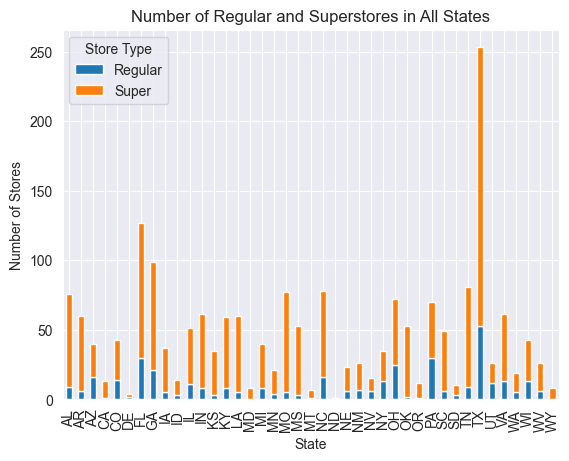

In [30]:
# Your solution here
# Create a pivot table to count the number of regular and superstores in each state
pivot_table = pd.pivot_table(df, values='storenum', index='strstate', columns='conversion', aggfunc='count')
pivot_table = pivot_table.fillna(0)
pivot_table

# Create a stacked bar chart
plt.figure(figsize=(20, 10))
pivot_table.plot(kind = 'bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Number of Stores')
plt.title('Number of Regular and Superstores in All States')
plt.legend(title='Store Type', labels=['Regular', 'Super'])
plt.show()

End Problem 12

# Question 13 (OPTIONAL)

In [31]:
# Your solution here
data_type = df['opendate'].dtypes
print(data_type)

# Extract the day, month, year into separate columns
df['day'] = df['opendate'].dt.day
df['month'] = df['opendate'].dt.month
df['year'] = df['opendate'].dt.year

df.head()

datetime64[ns]


,storenum,opendate,date_super,conversion,st,county,streetaddr,strcity,strstate,zipcode,type_store,lat,lon,day,month,year
0,1,1962-07-01,1997-03-01,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,1,7,1962
1,2,1964-08-01,1996-03-01,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,1,8,1964
2,4,1965-08-01,2002-03-01,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,1,8,1965
3,8,1967-10-01,1993-03-01,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,1,10,1967
4,7,1967-10-01,NaT,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,1,10,1967


## Question 14 (OPTIONAL)
Produce one additional "interesting" visualization pattern from this data set based on your learning and research.

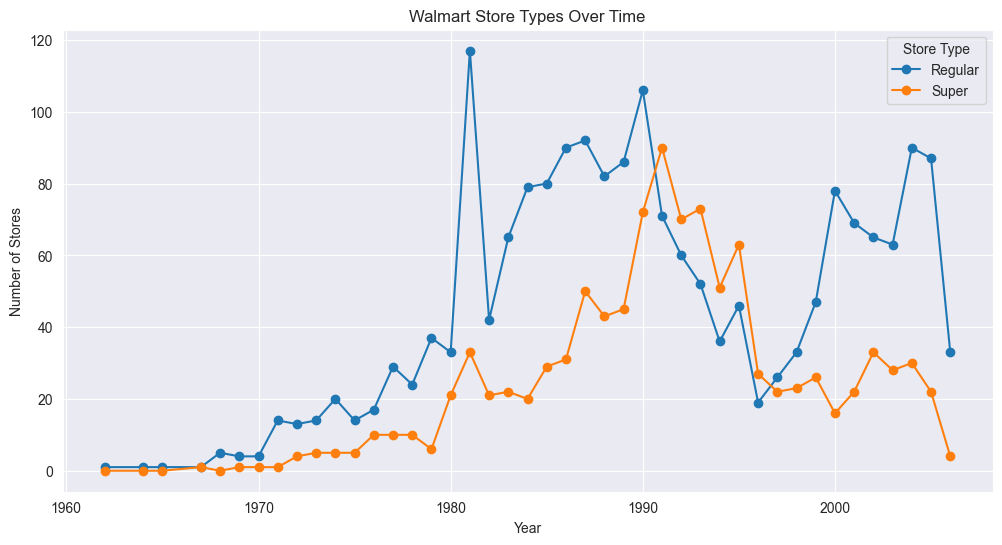

In [32]:
# Group by 'type_store' and 'year', and count the number of stores
store_type_count = df.groupby([df['year'], 'type_store'])['storenum'].count().unstack(fill_value=0)

# Create a time series line chart for the store types
store_type_count.plot(kind='line', marker='o', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Stores')
plt.title('Walmart Store Types Over Time')
plt.legend(title='Store Type', labels=['Regular', 'Super'])
plt.grid(True)
plt.show()

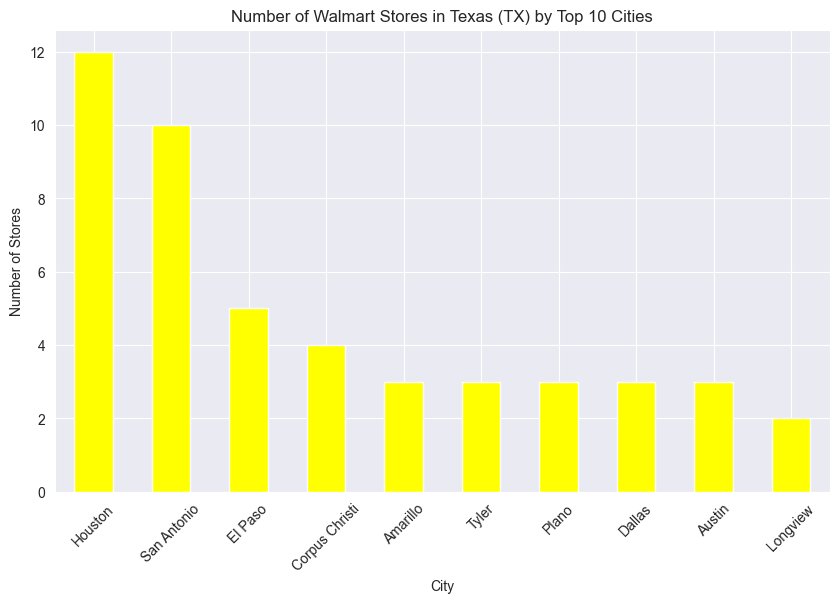

In [33]:

# Filter for stores in Texas (TX) - the state has the highest number of stores
TX_stores = df[df['strstate'] == 'TX']

# Group by city and count the number of stores in each city
store_count_by_city = TX_stores['strcity'].value_counts()

# Select the top 10 cities in TX
top_10_cities = store_count_by_city.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar', color='yellow')
plt.xlabel('City')
plt.ylabel('Number of Stores')
plt.title('Number of Walmart Stores in Texas (TX) by Top 10 Cities')
plt.xticks(rotation=45)
plt.show()


End Problems